In [ ]:
import sklearn
import pandas as pd
import json
import numpy as np
import scipy
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vaccinehesitancy = pd.read_csv(r'/content/drive/My Drive/CS 396 Data Science Pipeline/Datasets/Vaccine-Hesitancy (clean).csv')

In [ ]:
vaccine_df = pd.read_csv(r'/content/drive/My Drive/CS 396 Data Science Pipeline/Datasets/COVID-19_Vaccinations_in_the_United_States_County.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
education_df = pd.read_csv(r'/content/drive/My Drive/CS 396 Data Science Pipeline/Datasets/Education-attainment(clean).csv')

# VACCINE HESITANCY ANALYSIS

## SVI and CVAC

In [ ]:
vaccinehesitancy = vaccinehesitancy.rename(columns={"CVAC level of concern for vaccination rollout": "CVAC", "CVAC Level Of Concern": "CVAC Category"})
vaccinehesitancy = vaccinehesitancy.sort_values('FIPS Code')
vaccinehesitancy = vaccinehesitancy.reset_index(drop=True)

In [ ]:
vaccinehesitancy

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,SVI,SVI Category,CVAC,CVAC Category,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,State Code
0,1001,"Autauga County, Alabama",ALABAMA,0.1685,0.2233,0.1272,0.44,Moderate Vulnerability,0.61,High Concern,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,AL
1,1003,"Baldwin County, Alabama",ALABAMA,0.1544,0.1988,0.1169,0.22,Low Vulnerability,0.23,Low Concern,0.336,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,AL
2,1005,"Barbour County, Alabama",ALABAMA,0.1676,0.2337,0.1274,1.00,Very High Vulnerability,0.89,Very High Concern,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,AL
3,1007,"Bibb County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.60,High Vulnerability,0.76,High Concern,0.222,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,AL
4,1009,"Blount County, Alabama",ALABAMA,0.1854,0.2362,0.1416,0.42,Moderate Vulnerability,0.80,High Concern,0.215,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,"Sweetwater County, Wyoming",WYOMING,0.2184,0.2843,0.1584,0.37,Low Vulnerability,0.56,Moderate Concern,0.348,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,WY
3137,56039,"Teton County, Wyoming",WYOMING,0.2050,0.2671,0.1472,0.11,Very Low Vulnerability,0.44,Moderate Concern,0.789,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,WY
3138,56041,"Uinta County, Wyoming",WYOMING,0.2184,0.2843,0.1584,0.45,Moderate Vulnerability,0.48,Moderate Concern,0.388,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,WY
3139,56043,"Washakie County, Wyoming",WYOMING,0.2283,0.2943,0.1687,0.37,Low Vulnerability,0.69,High Concern,0.364,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,WY


In [ ]:
organizedhesitancy = []
states = []

def makelower(text):
  return text.lower()

vaccinehesitancy['State'] = vaccinehesitancy['State'].apply(makelower)
vaccinehesitancy['County Name'] = vaccinehesitancy['County Name'].apply(makelower)
vaccinehesitancy['SVI Category'] = vaccinehesitancy['SVI Category'].apply(makelower)
vaccinehesitancy['CVAC Category'] = vaccinehesitancy['CVAC Category'].apply(makelower)

for i in vaccinehesitancy['State']:
  if i not in states:
    states.append(i)
  else:
    pass

In [ ]:
svi_cvac_pearson = vaccinehesitancy[['SVI','CVAC']].corr(method='pearson')
print("The Pearson correlation coefficient matrix")
svi_cvac_pearson

The Pearson correlation coefficient matrix


,SVI,CVAC
SVI,1.000000,0.717859
CVAC,0.717859,1.000000


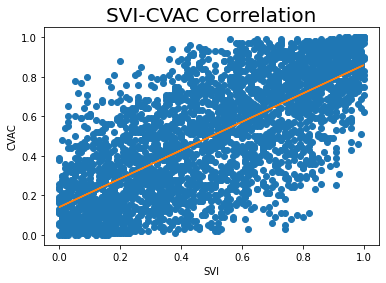

In [ ]:
plt.xlabel("SVI")
plt.ylabel("CVAC")
plt.title("SVI-CVAC Correlation",fontsize=20)
plt.plot(vaccinehesitancy['SVI'],vaccinehesitancy['CVAC'], "o")
m1, b1 = np.polyfit(vaccinehesitancy['SVI'], vaccinehesitancy['CVAC'], 1)
plt.plot(vaccinehesitancy['SVI'], m1*vaccinehesitancy['SVI'] + b1)

### Pearson correlation shows....

## Hesitancy and SVI

In [ ]:
hesitant = vaccinehesitancy['Estimated hesitant']
hest = vaccinehesitancy['Estimated hesitant or unsure']
stronglyhesitant = vaccinehesitancy['Estimated strongly hesitant']

In [ ]:
hesitant_pearson = vaccinehesitancy[['SVI','Estimated hesitant']].corr(method='pearson')
hesitantunsure_pearson = vaccinehesitancy[['SVI','Estimated hesitant or unsure']].corr(method='pearson')
stronglyhesitant_pearson = vaccinehesitancy[['SVI','Estimated strongly hesitant']].corr(method='pearson')
print("The Pearson correlation coefficient matrix for Hesitant\n", hesitant_pearson, "\n")
print("The Pearson correlation coefficient matrix for Hesitant or Unsure\n", hesitantunsure_pearson, "\n")
print("The Pearson correlation coefficient matrix for Strongly Hesitant\n", stronglyhesitant_pearson)

The Pearson correlation coefficient matrix for Hesitant
                         SVI  Estimated hesitant
SVI                 1.00000             0.28231
Estimated hesitant  0.28231             1.00000 

The Pearson correlation coefficient matrix for Hesitant or Unsure
                                   SVI  Estimated hesitant or unsure
SVI                           1.00000                       0.38649
Estimated hesitant or unsure  0.38649                       1.00000 

The Pearson correlation coefficient matrix for Strongly Hesitant
                                   SVI  Estimated strongly hesitant
SVI                          1.000000                     0.299722
Estimated strongly hesitant  0.299722                     1.000000


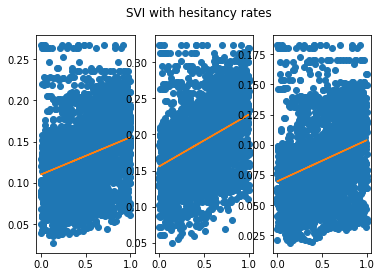

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
x = vaccinehesitancy['SVI']
y1 = vaccinehesitancy['Estimated hesitant']
y2 = vaccinehesitancy['Estimated hesitant or unsure']
y3 = vaccinehesitancy['Estimated strongly hesitant']
m1, b1 = np.polyfit(x, y1, 1)
m2, b2 = np.polyfit(x, y2, 1)
m3, b3 = np.polyfit(x, y3, 1)
fig.suptitle('SVI with hesitancy rates')
ax1.plot(x,y1, 'o')
ax1.plot(x, m1*x + b1)
ax2.plot(x,y2,'o')
ax2.plot(x, m2*x + b2)
ax3.plot(x,y3, 'o')
ax3.plot(x, m3*x + b3)


The Pearson correlation shows a positive correlation between the categories of hesitancy and the SVI score. As shown in the correlation coefficient matrix, the category with the highest correlation to SVI is the "estimated hesitant or unsure."

## States and SVI

In [ ]:
svicat = ['high vulnerability', 'low vulnerability', 'moderate vulnerability', 'very high vulnerability', 'very low vulnerability']

In [ ]:
vaccinehesitancy

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,SVI,SVI Category,CVAC,CVAC Category,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,State Code
0,1001,"autauga county, alabama",alabama,0.1685,0.2233,0.1272,0.44,moderate vulnerability,0.61,high concern,0.288,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,AL
1,1003,"baldwin county, alabama",alabama,0.1544,0.1988,0.1169,0.22,low vulnerability,0.23,low concern,0.336,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,AL
2,1005,"barbour county, alabama",alabama,0.1676,0.2337,0.1274,1.00,very high vulnerability,0.89,very high concern,0.257,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,AL
3,1007,"bibb county, alabama",alabama,0.1808,0.2526,0.1390,0.60,high vulnerability,0.76,high concern,0.222,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,AL
4,1009,"blount county, alabama",alabama,0.1854,0.2362,0.1416,0.42,moderate vulnerability,0.80,high concern,0.215,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,"sweetwater county, wyoming",wyoming,0.2184,0.2843,0.1584,0.37,low vulnerability,0.56,moderate concern,0.348,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,WY
3137,56039,"teton county, wyoming",wyoming,0.2050,0.2671,0.1472,0.11,very low vulnerability,0.44,moderate concern,0.789,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,WY
3138,56041,"uinta county, wyoming",wyoming,0.2184,0.2843,0.1584,0.45,moderate vulnerability,0.48,moderate concern,0.388,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,WY
3139,56043,"washakie county, wyoming",wyoming,0.2283,0.2943,0.1687,0.37,low vulnerability,0.69,high concern,0.364,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,WY


In [ ]:
vlow= [1,0]
low = [1, 0]
mod = [1, 0]
high = [1, 0]
vhigh = [1, 0]
def findcutoffs():
  svicat = vaccinehesitancy['SVI Category']
  svi = vaccinehesitancy['SVI']
  for i in range(3141):
    if svicat[i] == "very low vulnerability":
      if svi[i] < vlow[0]:
        vlow[0] = svi[i]
      if svi[i] > vlow[1]:
        vlow[1] = svi[i]
    if svicat[i] == "low vulnerability":
      if svi[i] < low[0]:
        low[0] = svi[i]
      if svi[i] > low[1]:
        low[1] = svi[i]
    elif svicat[i] == "moderate vulnerability":
      if svi[i] < mod[0]:
        mod[0] = svi[i]
      if svi[i] > mod[1]:
        mod[1] = svi[i]
    elif svicat[i] == "high vulnerability":
      if svi[i] < high[0]:
        high[0] = svi[i]
      if svi[i] > high[1]:
        high[1] = svi[i]
    elif svicat[i] == "very high vulnerability":
      if svi[i] < vhigh[0]:
        vhigh[0] = svi[i]
      if svi[i] > vhigh[1]:
        vhigh[1] = svi[i]
  return (vlow, low, mod, high, vhigh)

findcutoffs()

([0.0, 0.2], [0.2, 0.4], [0.4, 0.6], [0.6, 0.8], [0.8, 1.0])

In [ ]:
states = {}
for i in vaccinehesitancy['State']:
  if i not in states:
    states[i] = 1
  else:
    states[i] += 1

In [ ]:
averagesvi = {}
def getaveragesvi():
  for s in states:
    for i in range(3141):
      if vaccinehesitancy['State'][i] == s:
        if s not in averagesvi:
          averagesvi[s] = vaccinehesitancy['SVI'][i]
        else:
          averagesvi[s] += vaccinehesitancy['SVI'][i]
    averagesvi[s] = averagesvi[s]/states.get(s)
getaveragesvi()

In [ ]:
averagecvac = {}
def getaveragecvac():
  for s in states:
    for i in range(3141):
      if vaccinehesitancy['State'][i] == s:
        if s not in averagecvac:
          averagecvac[s] = vaccinehesitancy['CVAC'][i]
        else:
          averagecvac[s] += vaccinehesitancy['CVAC'][i]
    averagecvac[s] = averagecvac[s]/states.get(s)
getaveragecvac()

In [ ]:
sorted_svi_average = []
for w in sorted(averagesvi, key=averagesvi.get, reverse=False):
    if float(vlow[0]) <= float(averagesvi[w]) < float(vlow[1]):
      sorted_svi_average.append([w, averagesvi[w],"very low vulnerability"])
    if float(low[0]) <= float(averagesvi[w]) < float(low[1]):
      sorted_svi_average.append([w, averagesvi[w],"low vulnerability"])
    if float(mod[0]) <= float(averagesvi[w]) < float(mod[1]):
      sorted_svi_average.append([w, averagesvi[w],"moderate vulnerability"])
    if float(high[0]) <= float(averagesvi[w]) < float(high[1]):
      sorted_svi_average.append([w, averagesvi[w],"high vulnerability"])
    if float(vhigh[0]) <= float(averagesvi[w]) < float(vhigh[1]):
      sorted_svi_average.append([w, averagesvi[w],"very high vulnerability"])
sorted_svi_average

[['north dakota', 0.16641509433962265, 'very low vulnerability'],
 ['new hampshire', 0.16699999999999998, 'very low vulnerability'],
 ['vermont', 0.1992857142857143, 'very low vulnerability'],
 ['nebraska', 0.20161290322580633, 'low vulnerability'],
 ['iowa', 0.2391919191919191, 'low vulnerability'],
 ['wisconsin', 0.24097222222222228, 'low vulnerability'],
 ['wyoming', 0.2534782608695652, 'low vulnerability'],
 ['rhode island', 0.26, 'low vulnerability'],
 ['minnesota', 0.26988505747126434, 'low vulnerability'],
 ['montana', 0.2819642857142857, 'low vulnerability'],
 ['connecticut', 0.31625, 'low vulnerability'],
 ['south dakota', 0.32045454545454544, 'low vulnerability'],
 ['kansas', 0.320952380952381, 'low vulnerability'],
 ['utah', 0.32172413793103444, 'low vulnerability'],
 ['maine', 0.329375, 'low vulnerability'],
 ['massachusetts', 0.33, 'low vulnerability'],
 ['maryland', 0.36375, 'low vulnerability'],
 ['indiana', 0.3641304347826087, 'low vulnerability'],
 ['pennsylvania', 0.3

In [ ]:
sorted_cvac_average = []
for w in sorted(averagecvac, key=averagecvac.get, reverse=False):
    if float(vlow[0]) <= float(averagecvac[w]) < float(vlow[1]):
      sorted_cvac_average.append([w, averagecvac[w],"very low concern"])
    if float(low[0]) <= float(averagecvac[w]) < float(low[1]):
      sorted_cvac_average.append([w, averagecvac[w],"low concern"])
    if float(mod[0]) <= float(averagecvac[w]) < float(mod[1]):
      sorted_cvac_average.append([w, averagecvac[w],"moderate concern"])
    if float(high[0]) <= float(averagecvac[w]) < float(high[1]):
      sorted_cvac_average.append([w, averagecvac[w],"high concern"])
    if float(vhigh[0]) <= float(averagecvac[w]) < float(vhigh[1]):
      sorted_cvac_average.append([w, averagecvac[w],"very high concern"])
sorted_cvac_average

[['rhode island', 0.02, 'very low concern'],
 ['connecticut', 0.031249999999999997, 'very low concern'],
 ['massachusetts', 0.03285714285714286, 'very low concern'],
 ['iowa', 0.05949494949494945, 'very low concern'],
 ['new hampshire', 0.097, 'very low concern'],
 ['new jersey', 0.15761904761904763, 'very low concern'],
 ['north dakota', 0.16584905660377358, 'very low concern'],
 ['district of columbia', 0.17, 'very low concern'],
 ['maryland', 0.17041666666666666, 'very low concern'],
 ['wisconsin', 0.17152777777777778, 'very low concern'],
 ['vermont', 0.19714285714285715, 'very low concern'],
 ['delaware', 0.19999999999999998, 'very low concern'],
 ['pennsylvania', 0.202089552238806, 'low concern'],
 ['ohio', 0.2240909090909091, 'low concern'],
 ['new york', 0.23483870967741946, 'low concern'],
 ['nebraska', 0.23677419354838702, 'low concern'],
 ['kentucky', 0.27166666666666656, 'low concern'],
 ['south dakota', 0.2806060606060607, 'low concern'],
 ['virginia', 0.3079699248120303, 

## SVI, CVAC, and Race

### Hispanic

In [ ]:
hispanic_svi_p = vaccinehesitancy[['SVI','Percent Hispanic']].corr(method='pearson')
hispanic_svi_p

,SVI,Percent Hispanic
SVI,1.000000,0.313903
Percent Hispanic,0.313903,1.000000


In [ ]:
hispanic_svi_s = vaccinehesitancy[['SVI','Percent Hispanic']].corr(method='spearman')
hispanic_svi_s

,SVI,Percent Hispanic
SVI,1.000000,0.220508
Percent Hispanic,0.220508,1.000000


In [ ]:
hispanic_cvac_p = vaccinehesitancy[['CVAC','Percent Hispanic']].corr(method='pearson')
hispanic_cvac_p

,CVAC,Percent Hispanic
CVAC,1.000000,0.324224
Percent Hispanic,0.324224,1.000000


In [ ]:
hispanic_cvac_s = vaccinehesitancy[['CVAC','Percent Hispanic']].corr(method='spearman')
hispanic_cvac_s

,CVAC,Percent Hispanic
CVAC,1.000000,0.215147
Percent Hispanic,0.215147,1.000000


### Asian

In [ ]:
asian_svi_p = vaccinehesitancy[['SVI','Percent non-Hispanic Asian']].corr(method='pearson')
asian_svi_s = vaccinehesitancy[['SVI','Percent non-Hispanic Asian']].corr(method='spearman')
asian_cvac_p = vaccinehesitancy[['CVAC','Percent non-Hispanic Asian']].corr(method='pearson')
asian_cvac_s = vaccinehesitancy[['CVAC','Percent non-Hispanic Asian']].corr(method='spearman')

In [ ]:
asian_svi_p

,SVI,Percent non-Hispanic Asian
SVI,1.000000,-0.058608
Percent non-Hispanic Asian,-0.058608,1.000000


In [ ]:
asian_svi_s

,SVI,Percent non-Hispanic Asian
SVI,1.000000,-0.051676
Percent non-Hispanic Asian,-0.051676,1.000000


In [ ]:
asian_cvac_p

,CVAC,Percent non-Hispanic Asian
CVAC,1.000000,-0.139805
Percent non-Hispanic Asian,-0.139805,1.000000


In [ ]:
asian_cvac_s

,CVAC,Percent non-Hispanic Asian
CVAC,1.000000,-0.213438
Percent non-Hispanic Asian,-0.213438,1.000000


### Black

In [ ]:
black_svi_p = vaccinehesitancy[['SVI','Percent non-Hispanic Black']].corr(method='pearson')
black_svi_s = vaccinehesitancy[['SVI','Percent non-Hispanic Black']].corr(method='spearman')
black_cvac_p = vaccinehesitancy[['CVAC','Percent non-Hispanic Black']].corr(method='pearson')
black_cvac_s = vaccinehesitancy[['CVAC','Percent non-Hispanic Black']].corr(method='spearman')

In [ ]:
black_svi_p

,SVI,Percent non-Hispanic Black
SVI,1.000000,0.475836
Percent non-Hispanic Black,0.475836,1.000000


In [ ]:
black_svi_s

,SVI,Percent non-Hispanic Black
SVI,1.000000,0.463702
Percent non-Hispanic Black,0.463702,1.000000


In [ ]:
black_cvac_p

,CVAC,Percent non-Hispanic Black
CVAC,1.000000,0.359352
Percent non-Hispanic Black,0.359352,1.000000


In [ ]:
black_cvac_s

,CVAC,Percent non-Hispanic Black
CVAC,1.000000,0.295237
Percent non-Hispanic Black,0.295237,1.000000


### White

In [ ]:
white_svi_p = vaccinehesitancy[['SVI','Percent non-Hispanic White']].corr(method='pearson')
white_svi_s = vaccinehesitancy[['SVI','Percent non-Hispanic White']].corr(method='spearman')
white_cvac_p = vaccinehesitancy[['CVAC','Percent non-Hispanic White']].corr(method='pearson')
white_cvac_s = vaccinehesitancy[['CVAC','Percent non-Hispanic White']].corr(method='spearman')

In [ ]:
white_svi_p

,SVI,Percent non-Hispanic White
SVI,1.000000,-0.615726
Percent non-Hispanic White,-0.615726,1.000000


In [ ]:
white_svi_s

,SVI,Percent non-Hispanic White
SVI,1.000000,-0.603454
Percent non-Hispanic White,-0.603454,1.000000


In [ ]:
white_cvac_p

,CVAC,Percent non-Hispanic White
CVAC,1.00000,-0.51285
Percent non-Hispanic White,-0.51285,1.00000


In [ ]:
white_cvac_s

,CVAC,Percent non-Hispanic White
CVAC,1.000000,-0.495504
Percent non-Hispanic White,-0.495504,1.000000


### American Indian/Alaska Native

In [ ]:
aian_svi_p = vaccinehesitancy[['SVI','Percent non-Hispanic American Indian/Alaska Native']].corr(method='pearson')
aian_svi_s = vaccinehesitancy[['SVI','Percent non-Hispanic American Indian/Alaska Native']].corr(method='spearman')
aian_cvac_p = vaccinehesitancy[['CVAC','Percent non-Hispanic American Indian/Alaska Native']].corr(method='pearson')
aian_cvac_s = vaccinehesitancy[['CVAC','Percent non-Hispanic American Indian/Alaska Native']].corr(method='spearman')

In [ ]:
aian_svi_p

,SVI,Percent non-Hispanic American Indian/Alaska Native
SVI,1.00000,0.16756
Percent non-Hispanic American Indian/Alaska Native,0.16756,1.00000


In [ ]:
aian_svi_s

,SVI,Percent non-Hispanic American Indian/Alaska Native
SVI,1.000000,0.033246
Percent non-Hispanic American Indian/Alaska Native,0.033246,1.000000


In [ ]:
aian_cvac_p

,CVAC,Percent non-Hispanic American Indian/Alaska Native
CVAC,1.000000,0.139842
Percent non-Hispanic American Indian/Alaska Native,0.139842,1.000000


In [ ]:
aian_cvac_s

,CVAC,Percent non-Hispanic American Indian/Alaska Native
CVAC,1.00000,0.05592
Percent non-Hispanic American Indian/Alaska Native,0.05592,1.00000


### Native Hawaiian/Pacific Islander

In [ ]:
nhpi_svi_p = vaccinehesitancy[['SVI','Percent non-Hispanic Native Hawaiian/Pacific Islander']].corr(method='pearson')
nhpi_svi_s = vaccinehesitancy[['SVI','Percent non-Hispanic Native Hawaiian/Pacific Islander']].corr(method='spearman')
nhpi_cvac_p = vaccinehesitancy[['CVAC','Percent non-Hispanic Native Hawaiian/Pacific Islander']].corr(method='pearson')
nhpi_cvac_s = vaccinehesitancy[['CVAC','Percent non-Hispanic Native Hawaiian/Pacific Islander']].corr(method='spearman')

In [ ]:
nhpi_svi_p

,SVI,Percent non-Hispanic Native Hawaiian/Pacific Islander
SVI,1.000000,0.000462
Percent non-Hispanic Native Hawaiian/Pacific Islander,0.000462,1.000000


In [ ]:
nhpi_svi_s

,SVI,Percent non-Hispanic Native Hawaiian/Pacific Islander
SVI,1.000000,0.057773
Percent non-Hispanic Native Hawaiian/Pacific Islander,0.057773,1.000000


In [ ]:
nhpi_cvac_p

,CVAC,Percent non-Hispanic Native Hawaiian/Pacific Islander
CVAC,1.000000,0.002752
Percent non-Hispanic Native Hawaiian/Pacific Islander,0.002752,1.000000


In [ ]:
nhpi_cvac_s

,CVAC,Percent non-Hispanic Native Hawaiian/Pacific Islander
CVAC,1.000000,-0.024868
Percent non-Hispanic Native Hawaiian/Pacific Islander,-0.024868,1.000000


#Vaccine DF

In [ ]:
vaccine_df = vaccine_df.sample(10000,random_state = 0)
vaccine_df = vaccine_df.dropna()


In [ ]:
vaccine_df

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
87617,04/05/2022,20027,14,Clay County,KS,93.6,5361.0,67.0,5361.0,71.2,...,7.0,7.0,7.0,7.0,8002.0,7531.0,1399.0,6784.0,6132.0,1880.0
116762,03/27/2022,12059,13,Holmes County,FL,98.6,6931.0,35.3,6926.0,37.4,...,5.0,6.0,6.0,5.0,19617.0,18524.0,2900.0,17023.0,15624.0,3921.0
39046,04/20/2022,41011,16,Coos County,OR,97.8,40919.0,63.5,40908.0,66.6,...,8.0,8.0,8.0,7.0,64487.0,61391.0,8686.0,56760.0,52705.0,17093.0
55028,04/15/2022,50021,15,Rutland County,VT,73.5,46046.0,79.1,46033.0,82.8,...,8.0,8.0,8.0,7.0,58191.0,55626.0,7653.0,51677.0,47973.0,13232.0
43949,04/18/2022,04019,16,Pima County,AZ,97.7,859403.0,82.1,859010.0,86.7,...,3.0,3.0,3.0,3.0,1047279.0,990261.0,158289.0,905833.0,831972.0,212554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125715,03/24/2022,37191,12,Wayne County,NC,96.9,80845.0,65.7,80824.0,70.3,...,1.0,1.0,1.0,1.0,123131.0,115046.0,21015.0,103693.0,94031.0,20802.0
124806,03/24/2022,05077,12,Lee County,AR,90.5,3783.0,42.7,3780.0,45.0,...,7.0,7.0,7.0,6.0,8857.0,8395.0,1169.0,7777.0,7226.0,1787.0
104974,03/31/2022,28121,13,Rankin County,MS,98.1,88817.0,57.2,88811.0,60.6,...,2.0,2.0,3.0,2.0,155271.0,146473.0,26599.0,132636.0,119874.0,24326.0
70828,04/10/2022,21221,15,Trigg County,KY,94.0,7748.0,52.9,7746.0,55.8,...,3.0,3.0,3.0,2.0,14651.0,13894.0,2346.0,12684.0,11548.0,3394.0


In [ ]:
vaccine_df["Recip_State"].value_counts()

TX    54
GA    32
KS    29
NC    28
IL    28
MO    27
KY    26
IA    26
VA    25
MN    23
AR    22
OH    20
PA    19
NY    19
FL    18
IN    18
MS    18
MI    18
OK    17
PR    16
WV    16
AL    15
LA    15
ID    14
MT    12
WI    11
CO    11
SD    11
WY    11
TN    11
ND    11
AK    10
SC     9
NM     9
OR     9
CA     8
ME     7
WA     7
NJ     6
NV     5
MD     4
NE     3
CT     3
VT     3
UT     3
RI     2
AZ     2
NH     1
DC     1
MA     1
Name: Recip_State, dtype: int64

In [ ]:
tx_df = vaccine_df[vaccine_df["Recip_State"] == "TX"]


In [ ]:
tx_nonmetro= (tx_df["Metro_status"].value_counts())
print("Texas Counties:\n", tx_nonmetro)
# print("Texas Number of Metro Counties:", tx_metro)

Texas Counties:
 Non-metro    41
Metro        13
Name: Metro_status, dtype: int64


# Education Data

In [ ]:
def makelower(text):
  return text.lower()

In [ ]:
education_df['County, State'] = education_df['County, State'].apply(makelower)
education_df['State'] = education_df['State'].apply(makelower)
education_df

,GEO_ID,"County, State",State,Total Adult Population,Adult Population with High School Diploma or Higher,Adult Population with Bachelor's Degree or Higher
0,0500000US01001,"autauga county, alabama",alabama,37860.0,33587.0,10721.0
1,0500000US01003,"baldwin county, alabama",alabama,155563.0,140740.0,49636.0
2,0500000US01005,"barbour county, alabama",alabama,17797.0,13300.0,2067.0
3,0500000US01007,"bibb county, alabama",alabama,15987.0,12931.0,1814.0
4,0500000US01009,"blount county, alabama",alabama,39814.0,32976.0,5276.0
...,...,...,...,...,...,...
3136,0500000US56037,"sweetwater county, wyoming",wyoming,28236.0,26138.0,5989.0
3137,0500000US56039,"teton county, wyoming",wyoming,17782.0,16837.0,9789.0
3138,0500000US56041,"uinta county, wyoming",wyoming,13093.0,12190.0,2501.0
3139,0500000US56043,"washakie county, wyoming",wyoming,5515.0,5074.0,1313.0


In [ ]:
highSchool_bachelor_pearson = education_df[['Adult Population with High School Diploma or Higher','Adult Population with Bachelor\'s Degree or Higher']].corr(method='pearson')
print("The Pearson correlation coefficient matrix")
highSchool_bachelor_pearson

The Pearson correlation coefficient matrix


,Adult Population with High School Diploma or Higher,Adult Population with Bachelor's Degree or Higher
Adult Population with High School Diploma or Higher,1.000000,0.980357
Adult Population with Bachelor's Degree or Higher,0.980357,1.000000


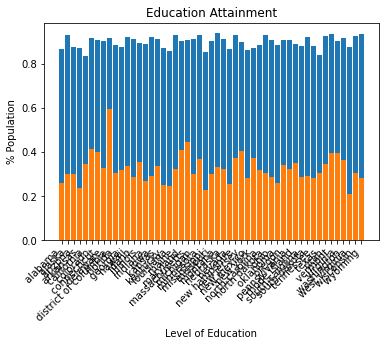

In [ ]:
edu_states = education_df["State"].unique()
edu_values = education_df.groupby(["State"]).mean()
# print(edu_values)
edu_values["HS/Total"] = edu_values["Adult Population with High School Diploma or Higher"]/edu_values["Total Adult Population"]
edu_values["BS/Total"] = edu_values["Adult Population with Bachelor's Degree or Higher"]/edu_values["Total Adult Population"]
# edu_values.sort_values(by=['HS/Total'])
# print(edu_values)


# fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
plt.bar(edu_states, edu_values["HS/Total"], width=0.8)
plt.bar(edu_states, edu_values["BS/Total"], width=0.8)
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Level of Education")
plt.ylabel('% Population')
plt.title("Education Attainment")
plt.show()


  




In [ ]:
newdf = vaccinehesitancy.copy()

In [ ]:
hcounty = vaccinehesitancy["County Name"]
ecounty = education_df['County, State']

def changename(txt):
  if txt == "Do√±a Ana County, New Mexico":
    return "DoÃƒÂ±a Ana County, New Mexico"
  else:
    return txt

education_df['County, State'] = education_df['County, State'].apply(changename)

newdf['Total Adult Population'] = education_df['Total Adult Population']
newdf['Adult Population with High School Diploma or Higher'] = education_df['Adult Population with High School Diploma or Higher']
newdf["Adult Population with Bachelor's Degree or Higher"] = education_df["Adult Population with Bachelor's Degree or Higher"]

newdf

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,SVI,SVI Category,CVAC,CVAC Category,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,State Code,Total Adult Population,Adult Population with High School Diploma or Higher,Adult Population with Bachelor's Degree or Higher
0,1001,"autauga county, alabama",alabama,0.1685,0.2233,0.1272,0.44,moderate vulnerability,0.61,high concern,...,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,AL,37860.0,33587.0,10721.0
1,1003,"baldwin county, alabama",alabama,0.1544,0.1988,0.1169,0.22,low vulnerability,0.23,low concern,...,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,AL,155563.0,140740.0,49636.0
2,1005,"barbour county, alabama",alabama,0.1676,0.2337,0.1274,1.00,very high vulnerability,0.89,very high concern,...,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,AL,17797.0,13300.0,2067.0
3,1007,"bibb county, alabama",alabama,0.1808,0.2526,0.1390,0.60,high vulnerability,0.76,high concern,...,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,AL,15987.0,12931.0,1814.0
4,1009,"blount county, alabama",alabama,0.1854,0.2362,0.1416,0.42,moderate vulnerability,0.80,high concern,...,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,AL,39814.0,32976.0,5276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,"sweetwater county, wyoming",wyoming,0.2184,0.2843,0.1584,0.37,low vulnerability,0.56,moderate concern,...,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,WY,28236.0,26138.0,5989.0
3137,56039,"teton county, wyoming",wyoming,0.2050,0.2671,0.1472,0.11,very low vulnerability,0.44,moderate concern,...,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,WY,17782.0,16837.0,9789.0
3138,56041,"uinta county, wyoming",wyoming,0.2184,0.2843,0.1584,0.45,moderate vulnerability,0.48,moderate concern,...,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,WY,13093.0,12190.0,2501.0
3139,56043,"washakie county, wyoming",wyoming,0.2283,0.2943,0.1687,0.37,low vulnerability,0.69,high concern,...,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,WY,5515.0,5074.0,1313.0


In [ ]:
newdf["Pct Adult Population with High School Diploma or Higher"] = newdf["Adult Population with High School Diploma or Higher"]/(newdf["Total Adult Population"])

In [ ]:
newdf["Pct Adult Population with Bachelor's Degree or Higher"] = newdf["Adult Population with Bachelor's Degree or Higher"]/(newdf["Total Adult Population"])

In [ ]:
print("*****************************High School Diploma or Higher *****************************")
hs_vhigh_svi= newdf[newdf["SVI Category"] == "very high vulnerability"]["Pct Adult Population with High School Diploma or Higher"].mean()
print("Average percentage of the Adult population with a high school diploma or higher with SVI Category with very high vulnerability %.2f. "%(float(hs_vhigh_svi * 100)))

hs_high_svi= newdf[newdf["SVI Category"] == "high vulnerability"]["Pct Adult Population with High School Diploma or Higher"].mean()
print("Average percentage of the Adult population with a high school diploma or higher with SVI Category with high vulnerability %.2f. "%(float(hs_high_svi * 100)))

hs_moderate_svi= newdf[newdf["SVI Category"] == "moderate vulnerability"]["Pct Adult Population with High School Diploma or Higher"].mean()
print("Average percentage of the Adult population with a high school diploma or higher with SVI Category with moderate vulnerability %.2f. "%(float(hs_moderate_svi * 100)))

hs_low_svi= newdf[newdf["SVI Category"] == "low vulnerability"]["Pct Adult Population with High School Diploma or Higher"].mean()
print("Average percentage of the Adult population with a high school diploma or higher with SVI Category with low vulnerability %.2f. "%(float(hs_low_svi * 100)))

hs_vlow_svi= newdf[newdf["SVI Category"] == "very low vulnerability"]["Pct Adult Population with High School Diploma or Higher"].mean()
print("Average percentage of the Adult population with a high school diploma or higher with SVI Category with very low vulnerability %.2f. "%(float(hs_vlow_svi * 100)))

print("***************************** Bachelor\'s Degree or Higher *****************************")
bs_vhigh_svi= newdf[newdf["SVI Category"] == "very high vulnerability"]["Pct Adult Population with Bachelor's Degree or Higher"].mean()
print("Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with very high vulnerability %.2f. "%(float(bs_vhigh_svi * 100)))

bs_high_svi= newdf[newdf["SVI Category"] == "high vulnerability"]["Pct Adult Population with Bachelor's Degree or Higher"].mean()
print("Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with high vulnerability %.2f. "%(float(bs_high_svi * 100)))

bs_moderate_svi= newdf[newdf["SVI Category"] == "moderate vulnerability"]["Pct Adult Population with Bachelor's Degree or Higher"].mean()
print("Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with moderate vulnerability %.2f. "%(float(bs_moderate_svi * 100)))

bs_low_svi= newdf[newdf["SVI Category"] == "low vulnerability"]["Pct Adult Population with Bachelor's Degree or Higher"].mean()
print("Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with low vulnerability %.2f. "%(float(bs_low_svi * 100)))

bs_vlow_svi= newdf[newdf["SVI Category"] == "very low vulnerability"]["Pct Adult Population with Bachelor's Degree or Higher"].mean()
print("Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with very low vulnerability %.2f. "%(float(bs_vlow_svi * 100)))

*****************************High School Diploma or Higher *****************************
Average percentage of the Adult population with a high school diploma or higher with SVI Category with very high vulnerability 81.18. 
Average percentage of the Adult population with a high school diploma or higher with SVI Category with high vulnerability 85.05. 
Average percentage of the Adult population with a high school diploma or higher with SVI Category with moderate vulnerability 88.00. 
Average percentage of the Adult population with a high school diploma or higher with SVI Category with low vulnerability 90.69. 
Average percentage of the Adult population with a high school diploma or higher with SVI Category with very low vulnerability 93.10. 
***************************** Bachelor's Degree or Higher *****************************
Average percentage of the Adult population with a Bachelor's Degree or higher with SVI Category with very high vulnerability 16.34. 
Average percentage of the Ad

In [ ]:
svi_hsedu_pearson = newdf[['Pct Adult Population with High School Diploma or Higher','SVI']].corr(method='pearson')
print("The Pearson correlation coefficient matrix")
svi_hsedu_pearson

The Pearson correlation coefficient matrix


,Pct Adult Population with High School Diploma or Higher,SVI
Pct Adult Population with High School Diploma or Higher,1.000000,-0.711692
SVI,-0.711692,1.000000


In [ ]:
svi_bacheloredu_pearson = newdf[['Pct Adult Population with Bachelor\'s Degree or Higher','SVI']].corr(method='pearson')
print("The Pearson correlation coefficient matrix")
svi_bacheloredu_pearson

The Pearson correlation coefficient matrix


,Pct Adult Population with Bachelor's Degree or Higher,SVI
Pct Adult Population with Bachelor's Degree or Higher,1.00000,-0.47013
SVI,-0.47013,1.00000


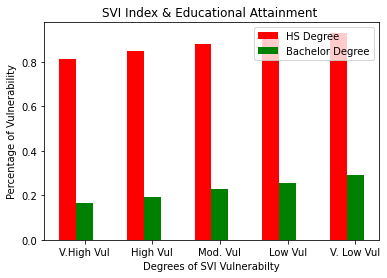

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [hs_vhigh_svi, hs_high_svi, hs_moderate_svi, hs_low_svi, hs_vlow_svi]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [bs_vhigh_svi, bs_high_svi, bs_moderate_svi, bs_low_svi,bs_vlow_svi]
bar2 = plt.bar(ind+width, yvals, width, color='g')

plt.xlabel("Degrees of SVI Vulnerabilty")
plt.ylabel('Percentage of Vulnerability')
plt.title("SVI Index & Educational Attainment ")
  
plt.xticks(ind+width,['V.High Vul', 'High Vul', 'Mod. Vul', 'Low Vul', 'V. Low Vul' ])
plt.legend( (bar1, bar2), ('HS Degree', 'Bachelor Degree') )

In [ ]:
svi_bacheloredu_pearson = newdf[['Estimated hesitant or unsure','SVI']].corr(method='pearson')
print("The Pearson correlation coefficient matrix")
svi_bacheloredu_pearson

The Pearson correlation coefficient matrix


,Estimated hesitant or unsure,SVI
Estimated hesitant or unsure,1.00000,0.38649
SVI,0.38649,1.00000


In [ ]:
svi_bacheloredu_pearson = newdf[['Estimated hesitant or unsure','Pct Adult Population with High School Diploma or Higher']].corr(method='spearman')
print("The Pearson correlation coefficient matrix")
svi_bacheloredu_pearson

The Pearson correlation coefficient matrix


,Estimated hesitant or unsure,Pct Adult Population with High School Diploma or Higher
Estimated hesitant or unsure,1.000000,-0.397172
Pct Adult Population with High School Diploma or Higher,-0.397172,1.000000


In [ ]:
svi_bacheloredu_pearson = newdf[['Estimated hesitant','Pct Adult Population with High School Diploma or Higher']].corr(method='spearman')
print("The Pearson correlation coefficient matrix")
svi_bacheloredu_pearson

The Pearson correlation coefficient matrix


,Estimated hesitant,Pct Adult Population with High School Diploma or Higher
Estimated hesitant,1.000000,-0.318483
Pct Adult Population with High School Diploma or Higher,-0.318483,1.000000


In [ ]:
svi_bacheloredu_pearson = newdf[['Estimated strongly hesitant','Pct Adult Population with High School Diploma or Higher']].corr(method='spearman')
print("The Pearson correlation coefficient matrix")
svi_bacheloredu_pearson

The Pearson correlation coefficient matrix


,Estimated strongly hesitant,Pct Adult Population with High School Diploma or Higher
Estimated strongly hesitant,1.000000,-0.345841
Pct Adult Population with High School Diploma or Higher,-0.345841,1.000000


# Machine Learning (SVI, CVAC, Education predicts Vaccine Hesitancy with GBR)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statistics import mean

In [ ]:
len(newdf['Pct Adult Population with High School Diploma or Higher'])
X=[]
for i in range(3141):
  X.append([newdf["Pct Adult Population with Bachelor's Degree or Higher"][i], newdf['SVI'][i], newdf['CVAC'][i]])

In [ ]:
y = newdf['Estimated strongly hesitant']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
gbt_score_to_model = {}
array = []
for depth in range(1,13,2):
    for learning_rate in [.01,.02,.03,.04,.05]:
        gbt_model = GradientBoostingRegressor(max_depth=depth, learning_rate=learning_rate)
        gbt_model.fit(X_train, y_train)
        score = gbt_model.score(X_test, y_test)
        
        gbt_score_to_model[score] = gbt_model
        # print("accuracy: " + str(score) + ", depth: " + str(depth) + ", learning_rate: " + str(learning_rate))

best_gbt_score = max(gbt_score_to_model.keys())
best_gbt_model = gbt_score_to_model[best_gbt_score]
print("accuracy: " + str(best_gbt_score) + ", depth: " + str(best_gbt_model.max_depth) + ", learning_rate: " + str(best_gbt_model.learning_rate))

KeyboardInterrupt: ignored

In [ ]:
y = newdf['Estimated hesitant']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
gbt_score_to_model = {}
array = []
for depth in range(1,13,2):
    for learning_rate in [.01,.02,.03,.04,.05]:
        gbt_model = GradientBoostingRegressor(max_depth=depth, learning_rate=learning_rate)
        gbt_model.fit(X_train, y_train)
        score = gbt_model.score(X_test, y_test)
        
        gbt_score_to_model[score] = gbt_model
        # print("accuracy: " + str(score) + ", depth: " + str(depth) + ", learning_rate: " + str(learning_rate))

best_gbt_score = max(gbt_score_to_model.keys())
best_gbt_model = gbt_score_to_model[best_gbt_score]
print("accuracy: " + str(best_gbt_score) + ", depth: " + str(best_gbt_model.max_depth) + ", learning_rate: " + str(best_gbt_model.learning_rate))

In [ ]:
y = newdf['Estimated hesitant or unsure']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
gbt_score_to_model = {}
array = []
for depth in range(1,13,2):
    for learning_rate in [.01,.02,.03,.04,.05]:
        gbt_model = GradientBoostingRegressor(max_depth=depth, learning_rate=learning_rate)
        gbt_model.fit(X_train, y_train)
        score = gbt_model.score(X_test, y_test)
        
        gbt_score_to_model[score] = gbt_model
        # print("accuracy: " + str(score) + ", depth: " + str(depth) + ", learning_rate: " + str(learning_rate))

best_gbt_score = max(gbt_score_to_model.keys())
best_gbt_model = gbt_score_to_model[best_gbt_score]
print("accuracy: " + str(best_gbt_score) + ", depth: " + str(best_gbt_model.max_depth) + ", learning_rate: " + str(best_gbt_model.learning_rate))

In [ ]:
X=[]
for i in range(3141):
  X.append([newdf['SVI'][i], newdf['CVAC'][i]])
X_train, X_test = train_test_split(X,test_size=0.2,random_state=0)

In [ ]:
gbt_score_to_model = {}
array = []
for depth in range(1,13,2):
    for learning_rate in [.01,.02,.03,.04,.05]:
        gbt_model = GradientBoostingRegressor(max_depth=depth, learning_rate=learning_rate)
        gbt_model.fit(X_train, y_train)
        score = gbt_model.score(X_test, y_test)
        
        gbt_score_to_model[score] = gbt_model
        # print("accuracy: " + str(score) + ", depth: " + str(depth) + ", learning_rate: " + str(learning_rate))

best_gbt_score = max(gbt_score_to_model.keys())
best_gbt_model = gbt_score_to_model[best_gbt_score]
print("accuracy: " + str(best_gbt_score) + ", depth: " + str(best_gbt_model.max_depth) + ", learning_rate: " + str(best_gbt_model.learning_rate))

## Vaccine Hesitancy ML

In [ ]:
vaccinehesitancy.head()

In [ ]:
## do classification model using svi, cvac, and percent hesitant

In [ ]:
len(newdf['Pct Adult Population with High School Diploma or Higher'])
X=[]
for i in range(3141):
  X.append([newdf["Pct Adult Population with Bachelor's Degree or Higher"][i], newdf['SVI'][i], newdf['CVAC'][i]])

In [ ]:
y = newdf['Estimated strongly hesitant']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
parameters = {"learning_rate":[0.01,0.02,0.03,0.04,0.05],
             "max_depth": [1,3,5,7,9,11],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              "criterion": ['friedman_mse', 'squared_error', 'mse'],
              "min_samples_split" : range(2,25)
              }

gbr = GradientBoostingRegressor()
gridsearch = GridSearchCV(gbr, parameters, cv=5, scoring = 'r2')
gridsearch.fit(X_train, y_train)

In [ ]:
print(gridsearch.best_estimator_)

In [ ]:
print('Best learning rate:', gridsearch.best_estimator_.get_params()['learning_rate'])
print('Best max_depth:', gridsearch.best_estimator_.get_params()['max_depth'])

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, learning_rate=0.05)
gbr.fit(X_train, y_train)
score = mean(cross_val_score(gbr, X_train, y_train, cv=5, scoring = 'r2'))
score

In [ ]:
gridsearch.best_score_

In [ ]:





gbt_score_to_model = {}
array = []
for depth in range(1,13,2):
    for learning_rate in [.01,.02,.03,.04,.05]:
        gbt_model = GradientBoostingRegressor(max_depth=depth, learning_rate=learning_rate)
        gbt_model.fit(X_train, y_train)
        score = gbt_model.score(X_test, y_test)
        
        gbt_score_to_model[score] = gbt_model
        # print("accuracy: " + str(score) + ", depth: " + str(depth) + ", learning_rate: " + str(learning_rate))

best_gbt_score = max(gbt_score_to_model.keys())
best_gbt_model = gbt_score_to_model[best_gbt_score]
print("accuracy: " + str(best_gbt_score) + ", depth: " + str(best_gbt_model.max_depth) + ", learning_rate: " + str(best_gbt_model.learning_rate))


In [ ]:
from statistics import median
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

y = newdf['Estimated hesitant or unsure']
X = newdf['SVI']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_bool = [1 if i <= median(y) else 0 for i in y_train]
# y_bool

temp = X_train.array
temp = temp.reshape(-1, 1) 
scaler = preprocessing.MinMaxScaler()
scaleddata = scaler.fit_transform(temp)
lr_model = LogisticRegression(solver='saga')


LR_results = mean(cross_val_score(lr_model, scaleddata, y_bool, cv=3, scoring='roc_auc'))

# print(temp)
# print(y_bool)

# LR_results = cross_validate(lr_model, temp, y_bool, cv=3, scoring='roc_auc')
print("roc auc score: {score}: ".format(
    score=LR_results
))
# LR_results = lr_model.fit(temp, y_bool)
# temp = temp.reshape(1,-1) 

roc auc score: 0.6727399520627186: 
